In [1]:
!pip install tensorflow
!pip install opencv-python

import pandas as pd
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from skimage.io import imread

from keras import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense,BatchNormalization
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator

In [2]:
import os
root_dir = os.getcwd()

In [3]:
print(root_dir)

C:\Users\user\OneDrive\Desktop\Datasets\original_images


In [4]:
folder_paths = []

for i in range(10):
    folder_paths.append(os.path.join(root_dir, str(i)))
    
for i in range(ord('A'), ord('Z') + 1):
    folder_paths.append(os.path.join(root_dir, chr(i)))

In [5]:
df = {"label":[], "path":[]}

for folder_path in folder_paths:
    for image_file in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_file)
        
        df['label'].append(folder_path[-1])
        df['path'].append(image_path)
        
df = pd.DataFrame(df)
df

,label,path
0,0,C:\Users\user\OneDrive\Desktop\Datasets\origin...
1,0,C:\Users\user\OneDrive\Desktop\Datasets\origin...
2,0,C:\Users\user\OneDrive\Desktop\Datasets\origin...
3,0,C:\Users\user\OneDrive\Desktop\Datasets\origin...
4,0,C:\Users\user\OneDrive\Desktop\Datasets\origin...
...,...,...
35995,Z,C:\Users\user\OneDrive\Desktop\Datasets\origin...
35996,Z,C:\Users\user\OneDrive\Desktop\Datasets\origin...
35997,Z,C:\Users\user\OneDrive\Desktop\Datasets\origin...
35998,Z,C:\Users\user\OneDrive\Desktop\Datasets\origin...


In [6]:
df.shape

(36000, 2)

In [7]:
df["path"][1001]

'C:\\Users\\user\\OneDrive\\Desktop\\Datasets\\original_images\\1\\10.jpg'

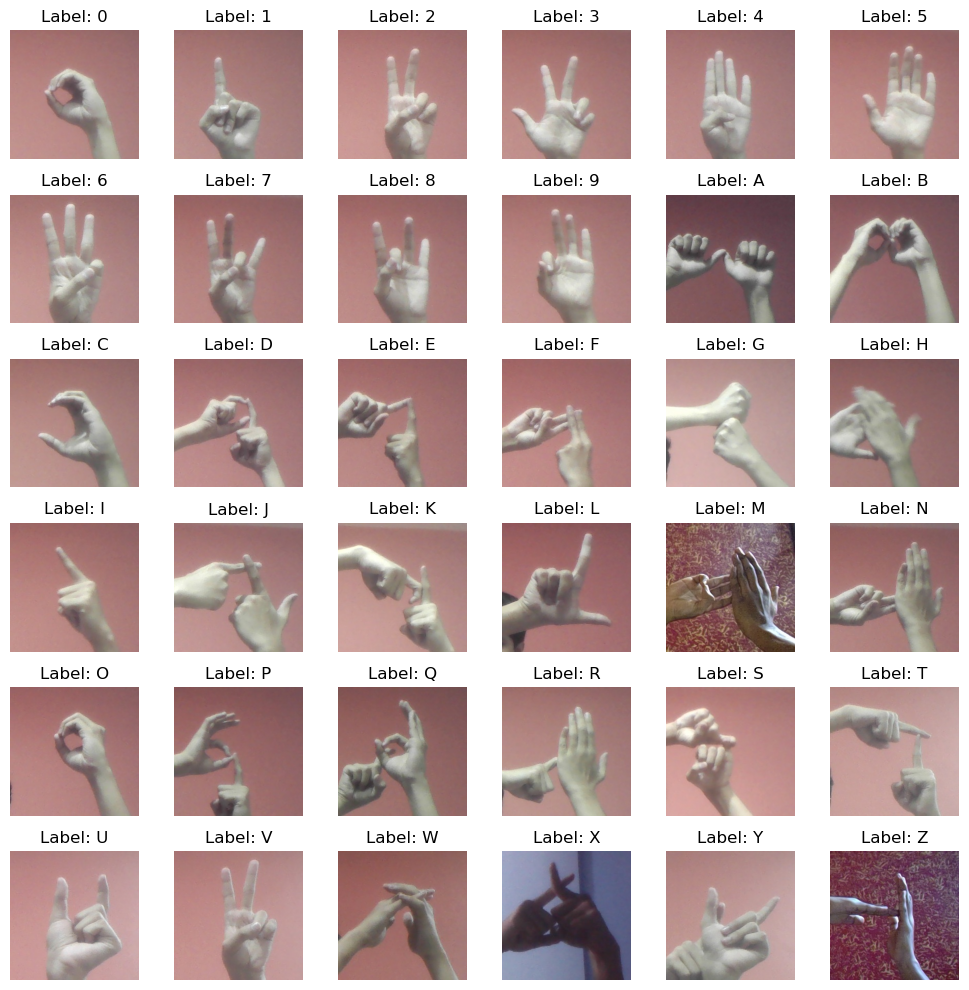

In [8]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt

# Assuming `df` is the DataFrame containing 'label' and 'path' columns

# Display one image per label
unique_labels = df['label'].unique()
num_images = len(unique_labels)

# Calculate the number of rows and columns for subplots
num_rows = int(num_images ** 0.5)
num_cols = num_images // num_rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))

for i, label in enumerate(unique_labels):
    label_df = df[df['label'] == label].head(1)  # Select one image per label
    image_path = label_df['path'].iloc[0]
    image = cv2.imread(image_path)
    
    # Convert the image from BGR to RGB for proper display with matplotlib
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Display the image as a subplot
    ax = axes[i // num_cols, i % num_cols]
    ax.imshow(image)
    ax.set_title(f"Label: {label}")
    ax.axis('off')

plt.tight_layout()
plt.show()


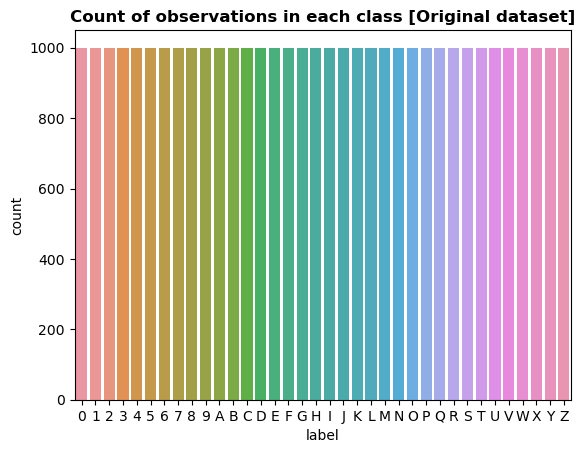

In [9]:
sns.countplot(data=df, x='label')

plt.title("Count of observations in each class [Original dataset]", fontweight='bold')
plt.show()

This dataset is already balanced and does not require resampling

In [10]:
# Function to convert image to grayscale
def convert_to_grayscale(image_path):
    image = cv2.imread(image_path)
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return grayscale_image

# Apply grayscale conversion to the "path" column
df["grayscale_image"] = df["path"].apply(convert_to_grayscale)

# Calculate and store the sizes of the grayscale images in a new column
df["grayscale_sizes"] = df["grayscale_image"].apply(lambda x: x.shape)

# Print the updated dataframe
df

,label,path,grayscale_image,grayscale_sizes
0,0,C:\Users\user\OneDrive\Desktop\Datasets\origin...,"[[126, 126, 126, 126, 125, 125, 125, 125, 126,...","(250, 250)"
1,0,C:\Users\user\OneDrive\Desktop\Datasets\origin...,"[[127, 126, 126, 126, 126, 126, 125, 125, 125,...","(250, 250)"
2,0,C:\Users\user\OneDrive\Desktop\Datasets\origin...,"[[191, 191, 191, 191, 192, 192, 192, 193, 192,...","(250, 250)"
3,0,C:\Users\user\OneDrive\Desktop\Datasets\origin...,"[[216, 217, 217, 217, 216, 214, 214, 214, 215,...","(250, 250)"
4,0,C:\Users\user\OneDrive\Desktop\Datasets\origin...,"[[163, 163, 163, 162, 162, 162, 162, 162, 162,...","(250, 250)"
...,...,...,...,...
35995,Z,C:\Users\user\OneDrive\Desktop\Datasets\origin...,"[[174, 178, 179, 180, 180, 176, 171, 173, 177,...","(250, 250)"
35996,Z,C:\Users\user\OneDrive\Desktop\Datasets\origin...,"[[235, 235, 235, 235, 235, 235, 236, 237, 229,...","(250, 250)"
35997,Z,C:\Users\user\OneDrive\Desktop\Datasets\origin...,"[[164, 165, 166, 165, 165, 165, 166, 168, 171,...","(250, 250)"
35998,Z,C:\Users\user\OneDrive\Desktop\Datasets\origin...,"[[167, 167, 167, 167, 165, 164, 164, 166, 166,...","(250, 250)"


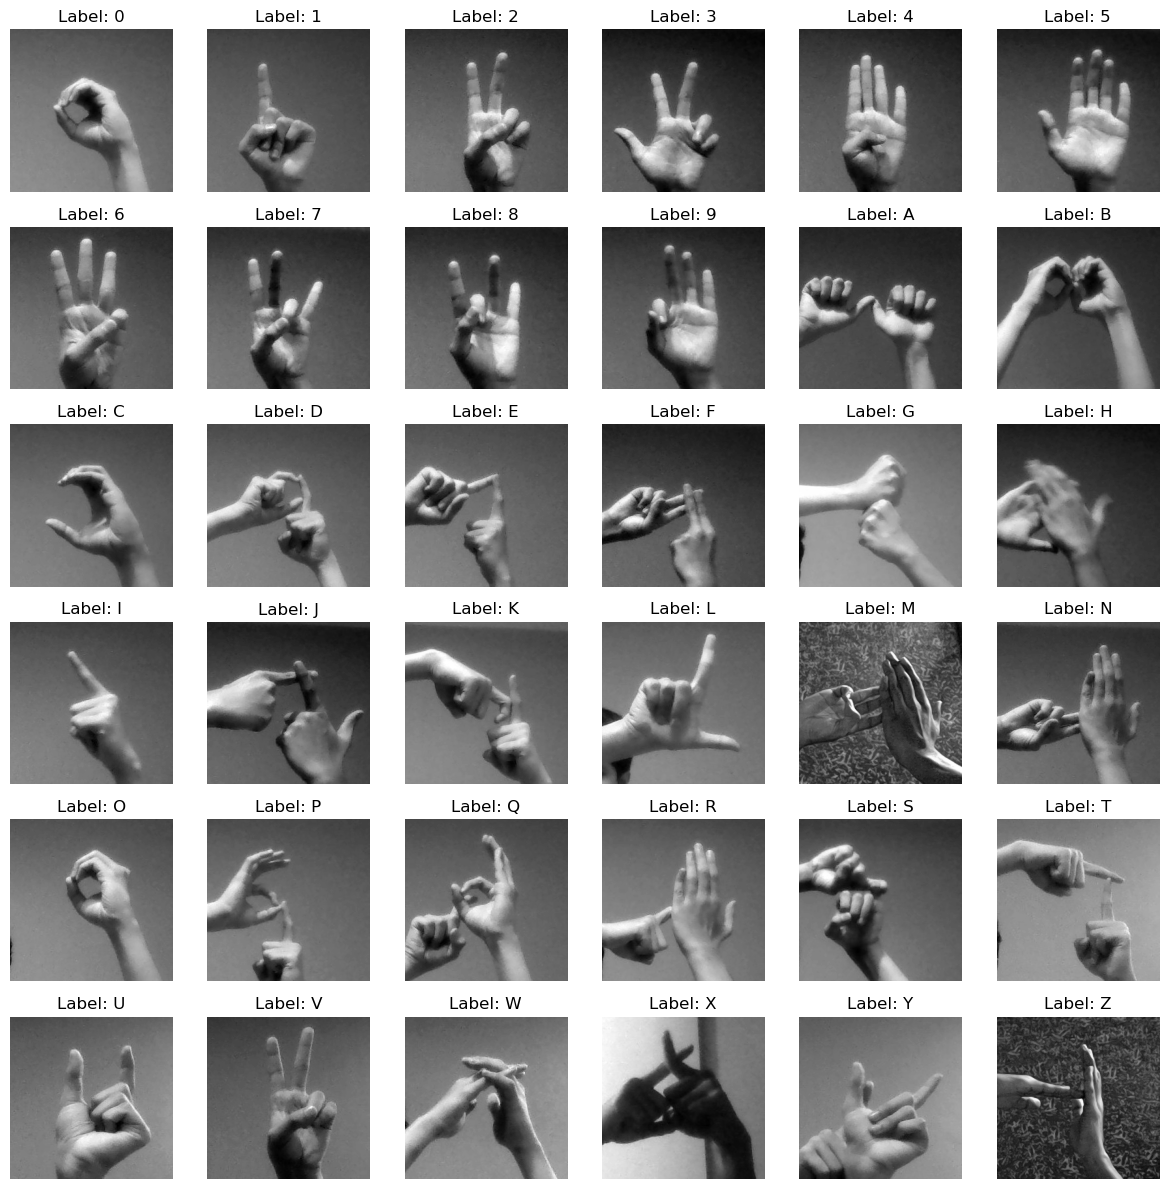

In [11]:
# Group the dataframe by label and get the first grayscale image for each label
grouped_data = df.groupby("label").first()

# Set up the subplots
fig, axes = plt.subplots(6, 6, figsize=(12, 12))

# Display the first grayscale image for each label in subplots
for i, (label, row) in enumerate(grouped_data.iterrows()):
    image = row["grayscale_image"]
    ax = axes[i // 6, i % 6]
    ax.imshow(image, cmap='gray')
    ax.set_title("Label: {}".format(label))
    ax.axis("off")

plt.tight_layout()
plt.show()

In [12]:
import cv2
import os
import uuid

# Create a directory to store the grayscale images
gray_scale_dir = "gray_scale_images"
os.makedirs(gray_scale_dir, exist_ok=True)

# Function to convert image to grayscale and save to file
def convert_and_save(image, label):
    label_dir = os.path.join(gray_scale_dir, str(label))
    os.makedirs(label_dir, exist_ok=True)
    
    image_path = os.path.join(label_dir, f"{label}_{uuid.uuid4().hex}.png")
    cv2.imwrite(image_path, image)
    
    return image_path

# Apply grayscale conversion and save to file, store the file paths in "gray_scalepath" column
df["gray_scalepath"] = df.apply(lambda row: convert_and_save(row["grayscale_image"], row["label"]), axis=1)

# Print the updated dataframe
df

,label,path,grayscale_image,grayscale_sizes,gray_scalepath
0,0,C:\Users\user\OneDrive\Desktop\Datasets\origin...,"[[126, 126, 126, 126, 125, 125, 125, 125, 126,...","(250, 250)",gray_scale_images\0\0_3fabd92add5b48ea80686114...
1,0,C:\Users\user\OneDrive\Desktop\Datasets\origin...,"[[127, 126, 126, 126, 126, 126, 125, 125, 125,...","(250, 250)",gray_scale_images\0\0_0b596e165f94485582885d6a...
2,0,C:\Users\user\OneDrive\Desktop\Datasets\origin...,"[[191, 191, 191, 191, 192, 192, 192, 193, 192,...","(250, 250)",gray_scale_images\0\0_76ecabd920b8487da117465d...
3,0,C:\Users\user\OneDrive\Desktop\Datasets\origin...,"[[216, 217, 217, 217, 216, 214, 214, 214, 215,...","(250, 250)",gray_scale_images\0\0_1d0143d78b8a4a64b7cf0c95...
4,0,C:\Users\user\OneDrive\Desktop\Datasets\origin...,"[[163, 163, 163, 162, 162, 162, 162, 162, 162,...","(250, 250)",gray_scale_images\0\0_f47077bdd3e84b8bb51f1384...
...,...,...,...,...,...
35995,Z,C:\Users\user\OneDrive\Desktop\Datasets\origin...,"[[174, 178, 179, 180, 180, 176, 171, 173, 177,...","(250, 250)",gray_scale_images\Z\Z_0d46cd7d574f4451b6e15271...
35996,Z,C:\Users\user\OneDrive\Desktop\Datasets\origin...,"[[235, 235, 235, 235, 235, 235, 236, 237, 229,...","(250, 250)",gray_scale_images\Z\Z_c372721652cf4c27abbca3b8...
35997,Z,C:\Users\user\OneDrive\Desktop\Datasets\origin...,"[[164, 165, 166, 165, 165, 165, 166, 168, 171,...","(250, 250)",gray_scale_images\Z\Z_91841f4d140d45c5a9b33a36...
35998,Z,C:\Users\user\OneDrive\Desktop\Datasets\origin...,"[[167, 167, 167, 167, 165, 164, 164, 166, 166,...","(250, 250)",gray_scale_images\Z\Z_b6e9c784615e4614aa6facd1...


In [13]:
df.head()

,label,path,grayscale_image,grayscale_sizes,gray_scalepath
0,0,C:\Users\user\OneDrive\Desktop\Datasets\origin...,"[[126, 126, 126, 126, 125, 125, 125, 125, 126,...","(250, 250)",gray_scale_images\0\0_3fabd92add5b48ea80686114...
1,0,C:\Users\user\OneDrive\Desktop\Datasets\origin...,"[[127, 126, 126, 126, 126, 126, 125, 125, 125,...","(250, 250)",gray_scale_images\0\0_0b596e165f94485582885d6a...
2,0,C:\Users\user\OneDrive\Desktop\Datasets\origin...,"[[191, 191, 191, 191, 192, 192, 192, 193, 192,...","(250, 250)",gray_scale_images\0\0_76ecabd920b8487da117465d...
3,0,C:\Users\user\OneDrive\Desktop\Datasets\origin...,"[[216, 217, 217, 217, 216, 214, 214, 214, 215,...","(250, 250)",gray_scale_images\0\0_1d0143d78b8a4a64b7cf0c95...
4,0,C:\Users\user\OneDrive\Desktop\Datasets\origin...,"[[163, 163, 163, 162, 162, 162, 162, 162, 162,...","(250, 250)",gray_scale_images\0\0_f47077bdd3e84b8bb51f1384...


In [14]:
# Split the data into training set and a temporary set
train_data,temp_data = train_test_split(df, test_size=0.2, random_state=42)

# Split the temporary set into test set and validation set
test_data, val_data = train_test_split(temp_data, test_size=0.5, random_state=42)

train_data = pd.DataFrame(train_data)
val_data = pd.DataFrame(val_data)
test_data = pd.DataFrame(test_data)

In [15]:
# Split the data into x and y
x_train = train_data['path']  # Assuming 'target' is the label column
y_train = train_data['label']

x_val = val_data['path']
y_val = val_data['label']

x_test = test_data['path']
y_test = test_data['label']


In [16]:
x_train.head()

2848     C:\Users\user\OneDrive\Desktop\Datasets\origin...
19402    C:\Users\user\OneDrive\Desktop\Datasets\origin...
13192    C:\Users\user\OneDrive\Desktop\Datasets\origin...
12680    C:\Users\user\OneDrive\Desktop\Datasets\origin...
12540    C:\Users\user\OneDrive\Desktop\Datasets\origin...
Name: path, dtype: object

In [17]:
train_data.shape

(28800, 5)

In [18]:
test_data.shape

(3600, 5)

In [19]:
val_data.shape

(3600, 5)

In [20]:
train_data

,label,path,grayscale_image,grayscale_sizes,gray_scalepath
2848,2,C:\Users\user\OneDrive\Desktop\Datasets\origin...,"[[56, 59, 54, 59, 54, 58, 68, 61, 54, 53, 66, ...","(250, 250)",gray_scale_images\2\2_60b3b7c42eb247cc8aa09e4d...
19402,J,C:\Users\user\OneDrive\Desktop\Datasets\origin...,"[[108, 104, 102, 105, 108, 109, 109, 108, 108,...","(250, 250)",gray_scale_images\J\J_d44a5c6796ed44c5b763afa5...
13192,D,C:\Users\user\OneDrive\Desktop\Datasets\origin...,"[[238, 240, 240, 239, 238, 237, 236, 238, 236,...","(250, 250)",gray_scale_images\D\D_eadbe127cca8498582bc9d4c...
12680,C,C:\Users\user\OneDrive\Desktop\Datasets\origin...,"[[154, 153, 153, 144, 131, 131, 130, 121, 122,...","(250, 250)",gray_scale_images\C\C_b585c3fee1c54c1b826b5122...
12540,C,C:\Users\user\OneDrive\Desktop\Datasets\origin...,"[[139, 143, 138, 118, 62, 41, 41, 49, 48, 54, ...","(250, 250)",gray_scale_images\C\C_e082b0696f0d448db4b2f0de...
...,...,...,...,...,...
16850,G,C:\Users\user\OneDrive\Desktop\Datasets\origin...,"[[64, 60, 66, 59, 57, 78, 81, 82, 80, 76, 72, ...","(250, 250)",gray_scale_images\G\G_878184a24e0742358d9984de...
6265,6,C:\Users\user\OneDrive\Desktop\Datasets\origin...,"[[88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, ...","(250, 250)",gray_scale_images\6\6_86fb5869c80d451f81e085ce...
11284,B,C:\Users\user\OneDrive\Desktop\Datasets\origin...,"[[120, 121, 121, 120, 119, 119, 119, 120, 120,...","(250, 250)",gray_scale_images\B\B_d78563d758af4a498d462d7f...
860,0,C:\Users\user\OneDrive\Desktop\Datasets\origin...,"[[97, 78, 63, 75, 83, 68, 55, 49, 51, 50, 50, ...","(250, 250)",gray_scale_images\0\0_d74a47739c324d39a393c1a3...


## ResNet50

In [21]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from keras.layers import GlobalAveragePooling2D


In [22]:
# Use the updated 'path' column as x_col in flow_from_dataframe
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
training_set = train_datagen.flow_from_dataframe(
    dataframe=train_data,
    x_col='path',
    y_col='label',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_dataframe(
    dataframe=test_data,
    x_col='path',
    y_col='label',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical')

validation = ImageDataGenerator(rescale=1./255)
validation_set = validation.flow_from_dataframe(
    dataframe=val_data,
    x_col='path',
    y_col='label',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical')

Found 28800 validated image filenames belonging to 36 classes.
Found 3600 validated image filenames belonging to 36 classes.
Found 3600 validated image filenames belonging to 36 classes.


In [23]:
resnet_base_model = ResNet50(input_shape=(64, 64, 3), include_top=False, weights='imagenet')

resnet_model = Sequential([
        resnet_base_model,
        GlobalAveragePooling2D(),
        Dense(128, activation="relu"),
        Dense(36, activation="softmax")
    ])

In [24]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2, 2, 2048)        23587712  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dense_1 (Dense)             (None, 36)                4644      
                                                                 
Total params: 23854628 (91.00 MB)
Trainable params: 23801508 (90.80 MB)
Non-trainable params: 53120 (207.50 KB)
_________________________________________________________________


In [25]:
# resnet_model.compile(loss='categorical_crossent'ropy', optimizer='adam', metrics=['accuracy'])
resnet_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  

In [26]:
resnet_results = resnet_model.fit(training_set, epochs=10, validation_data=validation_set) #, callbacks=early_stop)

Epoch 1/10
900/900 [==============================] - 1095s 1s/step - loss: 0.7319 - accuracy: 0.7806 - val_loss: 1.9862 - val_accuracy: 0.5342
Epoch 2/10
900/900 [==============================] - 1064s 1s/step - loss: 0.1449 - accuracy: 0.9553 - val_loss: 0.4167 - val_accuracy: 0.8908
Epoch 3/10
900/900 [==============================] - 1048s 1s/step - loss: 0.1198 - accuracy: 0.9650 - val_loss: 1.5815 - val_accuracy: 0.6383
Epoch 4/10
900/900 [==============================] - 1063s 1s/step - loss: 0.0860 - accuracy: 0.9746 - val_loss: 0.5133 - val_accuracy: 0.8736
Epoch 5/10
900/900 [==============================] - 1062s 1s/step - loss: 0.0718 - accuracy: 0.9786 - val_loss: 0.2768 - val_accuracy: 0.9153
Epoch 6/10
900/900 [==============================] - 1086s 1s/step - loss: 0.0678 - accuracy: 0.9803 - val_loss: 0.0646 - val_accuracy: 0.9811
Epoch 7/10
900/900 [==============================] - 1135s 1s/step - loss: 0.0752 - accuracy: 0.9794 - val_loss: 0.0955 - val_accuracy:

In [27]:
def get_metrics(history):
    metrics = pd.DataFrame(history)
    metrics['Epoch'] = [x for x in range(len(metrics))]
    metrics = metrics[['Epoch', 'loss', 'accuracy', 'val_loss', 'val_accuracy']]
    return metrics


def visualize_metrics(metrics, model):
    fig = plt.figure(figsize=(13,5))

    # Accuracy plot|
    plt.subplot(1,2,1)
    sns.lineplot(data=metrics, x='Epoch', y='accuracy', label='train_accuracy')
    sns.lineplot(data=metrics, x='Epoch', y='val_accuracy', label='val_accuracy')

    plt.title("Accuracy versus Epoch", fontweight='bold')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.5, 1])
    plt.legend(loc='lower left')

    # Loss plot
    plt.subplot(1,2,2)
    sns.lineplot(data=metrics, x='Epoch', y='loss', label='train_loss')
    sns.lineplot(data=metrics, x='Epoch', y='val_loss', label='val_loss')

    plt.title('Model Loss', fontweight='bold')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='lower left')

    fig.suptitle(f"Comparing Accuracy and Loss in {model}", fontweight='bold', fontsize=17)
    plt.show()

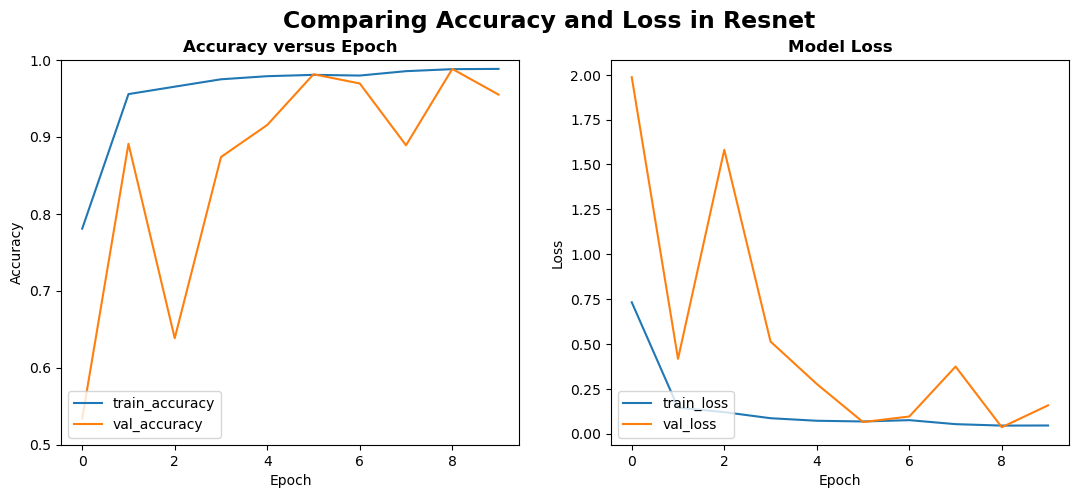

In [28]:
resnet_metrics = get_metrics(resnet_results.history)

visualize_metrics(resnet_metrics, "Resnet")

In [30]:
def model_evaluation(model, name):
    print(f"Accuracy of {name} model:\n")
    evaluation = model.evaluate(test_set)
    print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")
    evaluation = model.evaluate(training_set)
    print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")


In [31]:
model_evaluation(resnet_model, "Resnet")

Accuracy of Resnet model:

113/113 [==============================] - 28s 250ms/step - loss: 0.1670 - accuracy: 0.9589
Test Accuracy: 95.89%
900/900 [==============================] - 218s 242ms/step - loss: 0.2785 - accuracy: 0.9348
Train Accuracy: 93.48%


## CNN

In [32]:
# Use the updated 'path' column as x_col in flow_from_dataframe
train_datagen = ImageDataGenerator(rescale=1/255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
training_set = train_datagen.flow_from_dataframe(
    dataframe=train_data,
    x_col='gray_scalepath',
    y_col='label',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_dataframe(
    dataframe=test_data,
    x_col='gray_scalepath',
    y_col='label',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical')

Found 28800 validated image filenames belonging to 36 classes.
Found 3600 validated image filenames belonging to 36 classes.


In [33]:
validation = ImageDataGenerator(rescale=1./255)
validation_set = validation.flow_from_dataframe(
    dataframe=val_data,
    x_col='gray_scalepath',
    y_col='label',
    target_size=(64, 64),
    
    batch_size=32,
    class_mode='categorical')

Found 3600 validated image filenames belonging to 36 classes.


In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

num_classes = 36  # Number of classes

cnn_model = Sequential()

cnn_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Flatten())

cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.5))

cnn_model.add(Dense(num_classes, activation='softmax'))  # Use softmax activation for multiclass classification

cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  # Use categorical_crossentropy loss for multiclass classification


In [35]:
early_stop = EarlyStopping(monitor='val_loss', patience=4, mode='min')


In [36]:
cnn_results = cnn_model.fit(training_set, epochs=10, validation_data=validation_set) #, callbacks=early_stop)

Epoch 1/10
900/900 [==============================] - 1988s 2s/step - loss: 2.5563 - accuracy: 0.2752 - val_loss: 0.7946 - val_accuracy: 0.7769
Epoch 2/10
900/900 [==============================] - 172s 192ms/step - loss: 1.0662 - accuracy: 0.6604 - val_loss: 0.3248 - val_accuracy: 0.9050
Epoch 3/10
900/900 [==============================] - 171s 190ms/step - loss: 0.7131 - accuracy: 0.7692 - val_loss: 0.1650 - val_accuracy: 0.9544
Epoch 4/10
900/900 [==============================] - 179s 199ms/step - loss: 0.5576 - accuracy: 0.8163 - val_loss: 0.1154 - val_accuracy: 0.9683
Epoch 5/10
900/900 [==============================] - 166s 185ms/step - loss: 0.4713 - accuracy: 0.8458 - val_loss: 0.0801 - val_accuracy: 0.9811
Epoch 6/10
900/900 [==============================] - 167s 185ms/step - loss: 0.3965 - accuracy: 0.8686 - val_loss: 0.0539 - val_accuracy: 0.9853
Epoch 7/10
900/900 [==============================] - 175s 194ms/step - loss: 0.3642 - accuracy: 0.8803 - val_loss: 0.0447 - v

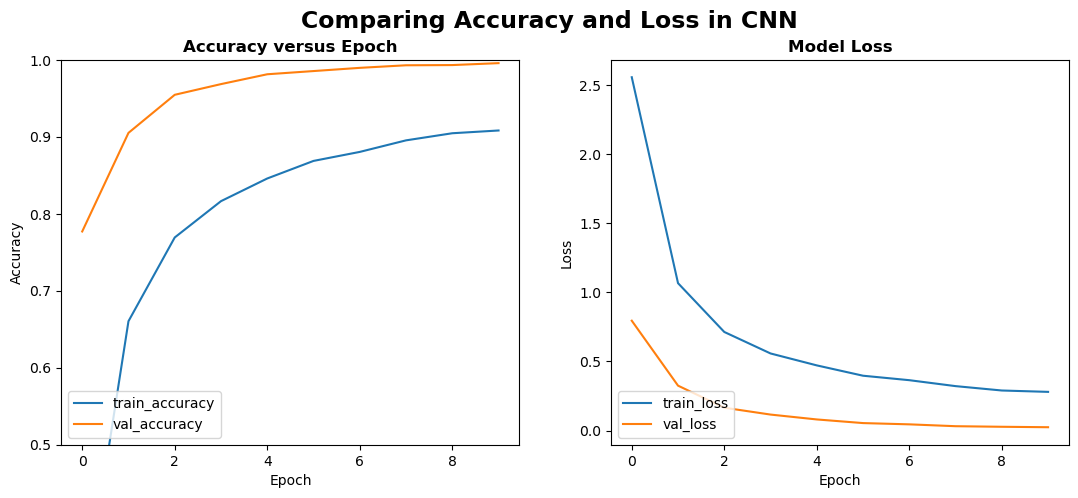

In [37]:
cnn_metrics = get_metrics(cnn_results.history)

visualize_metrics(cnn_metrics, "CNN")

In [38]:
model_evaluation(cnn_model, "CNN")

Accuracy of CNN model:

113/113 [==============================] - 17s 150ms/step - loss: 0.0423 - accuracy: 0.9881
Test Accuracy: 98.81%
900/900 [==============================] - 54s 59ms/step - loss: 0.0474 - accuracy: 0.9874
Train Accuracy: 98.74%


## EfficientNetB3

In [39]:
!pip install efficientnet

In [40]:
from efficientnet.keras import EfficientNetB3
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D, Dense

In [41]:
efficientnet_base_model = EfficientNetB3(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

In [42]:
# Build the model architecture
efficientnet_model = Sequential([
    efficientnet_base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation="relu"),
    Dense(36, activation="softmax")
])

In [ ]:
# resnet_model.compile(loss='categorical_crossent'ropy', optimizer='adam', metrics=['accuracy'])
efficientnet_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [46]:
efficientnet_results = efficientnet_model.fit(training_set, epochs=10, validation_data=validation_set) #, callbacks=early_stop)

Epoch 1/10
900/900 [==============================] - 877s 974ms/step - loss: 0.0326 - accuracy: 0.9918 - val_loss: 0.0071 - val_accuracy: 0.9972
Epoch 2/10
900/900 [==============================] - 688s 764ms/step - loss: 0.0456 - accuracy: 0.9876 - val_loss: 0.0095 - val_accuracy: 0.9972
Epoch 3/10
900/900 [==============================] - 690s 767ms/step - loss: 0.0337 - accuracy: 0.9900 - val_loss: 0.0416 - val_accuracy: 0.9922
Epoch 4/10
900/900 [==============================] - 688s 765ms/step - loss: 0.0286 - accuracy: 0.9923 - val_loss: 0.0105 - val_accuracy: 0.9967
Epoch 5/10
900/900 [==============================] - 749s 832ms/step - loss: 0.0297 - accuracy: 0.9923 - val_loss: 0.1918 - val_accuracy: 0.9844
Epoch 6/10
900/900 [==============================] - 761s 846ms/step - loss: 0.0323 - accuracy: 0.9913 - val_loss: 0.0062 - val_accuracy: 0.9981
Epoch 7/10
900/900 [==============================] - 689s 766ms/step - loss: 0.0244 - accuracy: 0.9941 - val_loss: 5.7777e-

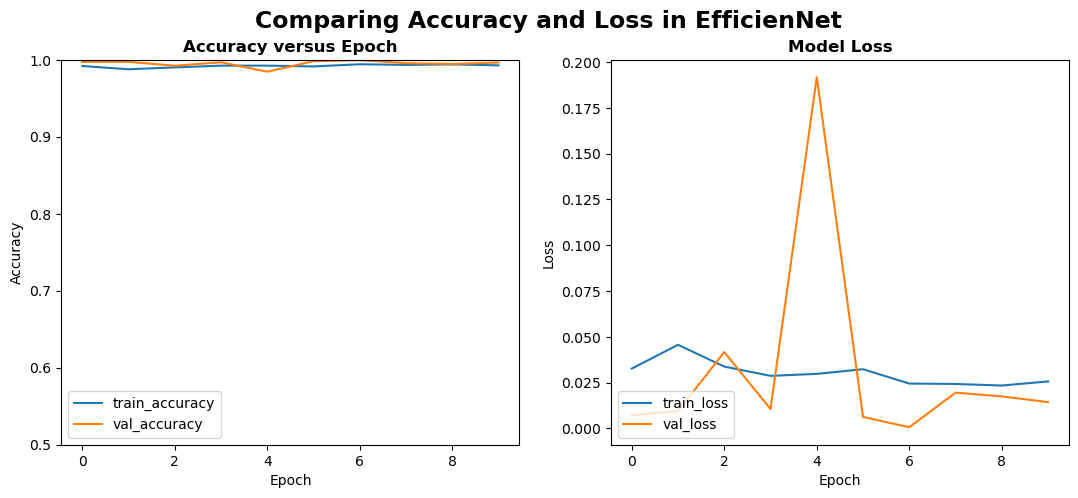

In [47]:
efficient_metrics = get_metrics(efficientnet_results.history)

visualize_metrics(efficient_metrics, "EfficienNet")

In [48]:
model_evaluation(efficientnet_model, "EfficientNet")

Accuracy of EfficientNet model:

113/113 [==============================] - 17s 146ms/step - loss: 0.0155 - accuracy: 0.9964
Test Accuracy: 99.64%
900/900 [==============================] - 132s 146ms/step - loss: 0.0160 - accuracy: 0.9962
Train Accuracy: 99.62%
